In [65]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 워닝 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
tmp_frm = pd.read_excel('./data/visualization_data/시도별 전출입 인구수.xlsx' , 
                        header = 0)

tmp_frm = tmp_frm.fillna(method='ffill')
seoul_frm = tmp_frm[ (tmp_frm['전출지별'] == '서울특별시') & (tmp_frm['전입지별'] != '서울특별시') ]
seoul_frm.drop(['전출지별'] , axis = 1 , inplace = True) 
seoul_frm.rename({'전입지별' : '전입지'}, axis = 1 , inplace = True)
seoul_frm.set_index('전입지' , inplace = True)
seoul_frm


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,2441242.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,237684.0,278411.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0


- area plot

In [10]:
# 충청남도, 경상북도, 강원도, 전라남도 인구 데이터만 선택
# 컬럼 인덱스는 1970 ~ 2017
seoul_frm.columns = seoul_frm.columns.astype('int')
subset_frm = seoul_frm.loc[['충청남도','경상북도','강원도','전라남도'], :]
subset_frm.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954.0,18943.0,23406.0,27139.0,25509.0,51205.0,41447.0,43993.0,48091.0,45388.0,...,27458.0,24889.0,24522.0,24723.0,22269.0,21486.0,21473.0,22299.0,21741.0,21020.0
경상북도,11868.0,16459.0,22073.0,27531.0,26902.0,46177.0,40376.0,41155.0,42940.0,43565.0,...,15425.0,16569.0,16042.0,15818.0,15191.0,14420.0,14456.0,15113.0,14236.0,12464.0
강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,26700.0,27599.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0
전라남도,10513.0,16755.0,20157.0,22160.0,21314.0,46610.0,46251.0,43430.0,44624.0,47934.0,...,16601.0,17468.0,16429.0,15974.0,14765.0,14187.0,14591.0,14598.0,13065.0,12426.0


In [15]:
t_seoul_frm = subset_frm.T
t_seoul_frm.head()

전입지,충청남도,경상북도,강원도,전라남도
1970,15954.0,11868.0,9352.0,10513.0
1971,18943.0,16459.0,12885.0,16755.0
1972,23406.0,22073.0,13561.0,20157.0
1973,27139.0,27531.0,16481.0,22160.0
1974,25509.0,26902.0,15479.0,21314.0


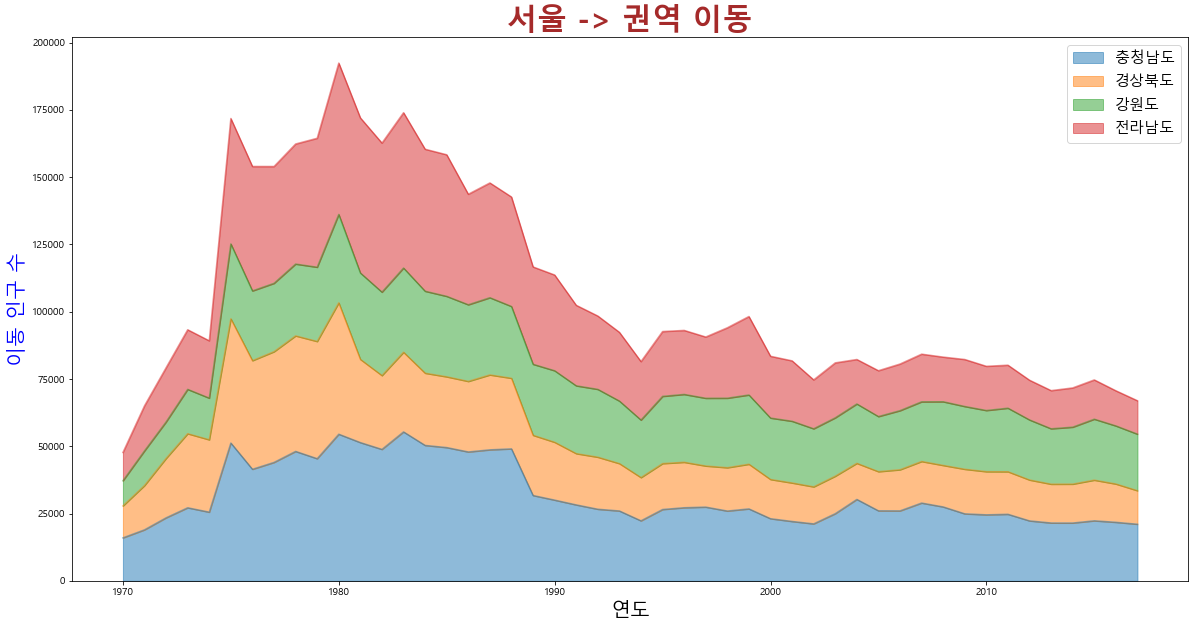

In [20]:
# area plot
t_seoul_frm.plot(kind = 'area', figsize=(20,10), alpha=0.5)
plt.title('서울 -> 권역 이동', size = 30, color = 'brown', weight='bold')
plt.ylabel('이동 인구 수', size = 20, color = 'blue')
plt.xlabel('연도', size = 20)
plt.legend(loc='best', fontsize= 15)

plt.show()
plt.close()

- bubble plot

In [23]:
mpg_frm = pd.read_excel('./data/visualization_data/mpg_visualization.xlsx',
                       header = 0,
                       index_col = 0)

In [24]:
mpg_frm.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [26]:
auto_mpg_frm = pd.read_csv('./data/visualization_data/auto-mpg.csv',
                       header = None)
auto_mpg_frm.columns = ['mpg','cylinders','displacement','horsepower','weight',
                        'acceleration','model year','origin','name']
auto_mpg_frm.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [28]:
cylinders_size = auto_mpg_frm.cylinders / auto_mpg_frm.cylinders.max() * 300
print('type - ', type(cylinders_size))
print('data - ')
print(cylinders_size)

type -  <class 'pandas.core.series.Series'>
data - 
0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: cylinders, Length: 398, dtype: float64


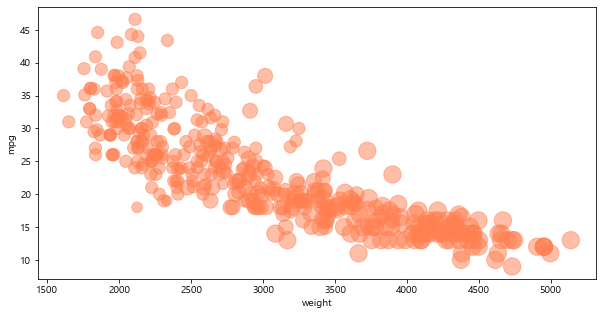

In [30]:
auto_mpg_frm.plot(kind = 'scatter', x = 'weight', y = 'mpg',
                 color = 'coral', figsize = (10,5), alpha = 0.5,
                 s = cylinders_size)

plt.savefig('./data/visualization_data/scatter.png')
plt.show()
plt.close()

In [31]:
# 양적 자료의 데이터 분포 확인 - boxplot

mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


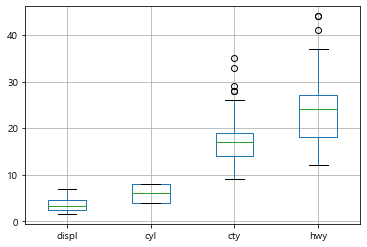

In [32]:
mpg_frm[['displ', 'cyl', 'cty', 'hwy']].boxplot()

plt.show()
plt.close()

In [33]:
# 질적 자료에 대한 데이터 빈도 확인 - value_counts()

mpg_frm['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [35]:
# 문제01]
# 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
# 배기량이 4 이하인 자동차화 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 
# 높은지 알아보자

print(mpg_frm[mpg_frm['displ']<=4]['hwy'].mean())
print(mpg_frm[mpg_frm['displ']>=5]['hwy'].mean())
print()

print(mpg_frm.query('displ <= 4')['hwy'].mean())
print(mpg_frm.query('displ >= 5')['hwy'].mean())

25.96319018404908
18.07894736842105

25.96319018404908
18.07894736842105


In [36]:
# 문제 02]
# 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
# audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.
print(mpg_frm[mpg_frm['manufacturer']=='audi']['cty'].mean())
print(mpg_frm[mpg_frm['manufacturer']=='toyota']['cty'].mean())

17.61111111111111
18.529411764705884


In [39]:
# 문제 03]
# chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
# 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.
print(mpg_frm[mpg_frm['manufacturer']=='chevrolet']['hwy'].mean())
print(mpg_frm[mpg_frm['manufacturer']=='ford']['hwy'].mean())
print(mpg_frm[mpg_frm['manufacturer']=='honda']['hwy'].mean())

manufacturer_list = ['chevrolet', 'ford', 'honda']
print(mpg_frm.query('manufacturer in @manufacturer_list')['hwy'].mean())

21.894736842105264
19.36
32.55555555555556
22.50943396226415


In [47]:
print('연료가격 변수 추가(price_fl) - ')
print('c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22')

price_fl = pd.DataFrame({'fl': ['c', 'd', 'e', 'p', 'r'],
                         'price_fl' : [2.35, 2.38, 2.11, 2.76, 2.22]})
price_fl

merge_mpg_frm = pd.merge(mpg_frm, price_fl, how= 'inner', on = 'fl')
merge_mpg_frm

연료가격 변수 추가(price_fl) - 
c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl_x,price_fl_y
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv,2.38,2.38
230,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.38,2.38
231,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,2.38,2.38
232,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.38,2.38


In [48]:
# 데이터 전처리 과정에서 결측값 확인하기
merge_mpg_frm.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl_x      0
price_fl_y      0
dtype: int64

In [50]:
# 구동방식(drv) 별 고속도로 연비(hwy)평균
# 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자

for idx in range(0,234,7):
    merge_mpg_frm.loc[idx, 'hwy'] = np.NaN

In [51]:
merge_mpg_frm.isna().sum()

manufacturer     0
model            0
displ            0
year             0
cyl              0
trans            0
drv              0
cty              0
hwy             34
fl               0
class            0
price_fl_x       0
price_fl_y       0
dtype: int64

In [52]:
merge_mpg_frm[['drv', 'hwy']].isna().sum()

drv     0
hwy    34
dtype: int64

In [54]:
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
# dropna()

drop_merge_mpg_frm = merge_mpg_frm[['drv', 'hwy']].dropna()
drop_merge_mpg_frm[['drv', 'hwy']].isna().sum()
drop_merge_mpg_frm.groupby('drv').mean().sort_values(by='hwy', ascending=False)

,hwy
drv,
f,27.921348
r,20.772727
4,19.235955


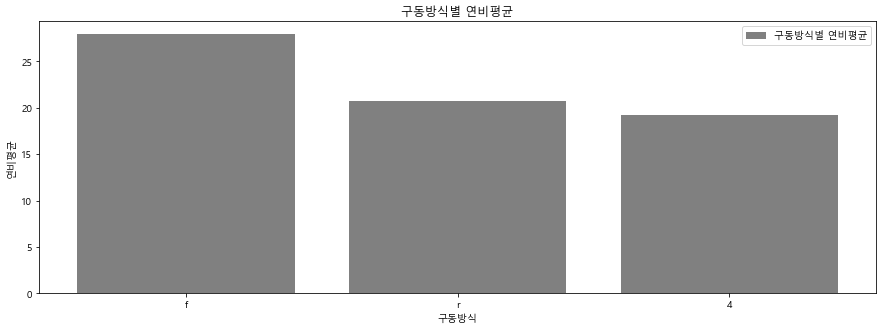

In [69]:
# 구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자
mean_frm = drop_merge_mpg_frm.groupby('drv').mean().sort_values(by='hwy', ascending=False)
X = mean_frm.index.values
Y = mean_frm.values.reshape(-1,)


plt.figure(figsize = (15,5))
plt.bar(np.arange(len(X)), Y, color = 'gray')
plt.title('구동방식별 연비평균')
plt.xlabel('구동방식')
plt.ylabel('연비평균')
plt.xticks(np.arange(len(X)), X)
plt.legend(loc = 'best', labels = ['구동방식별 연비평균'])

plt.show()
plt.close()

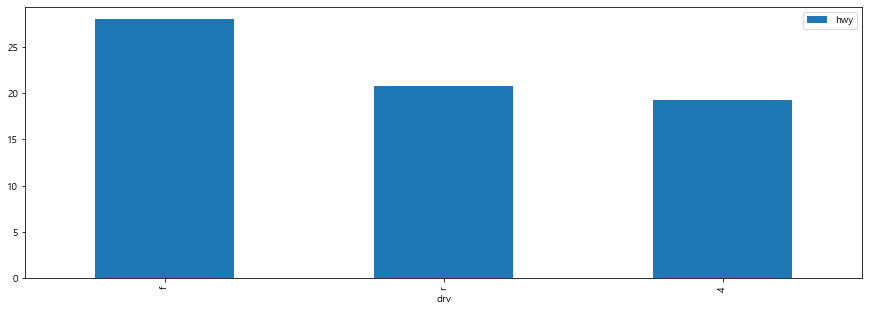

In [71]:
mean_frm.plot(kind='bar', figsize=(15,5))
plt.show()
plt.close()

In [74]:
# 위에서 했던 방식과 동일하게 구동방식별 고속도로, 도시연비의 평균을 구해보고
# 이를 데이터 프레임으로 만들어서 막대바로 시각화 해 보자
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
drop2_merge_mpg_frm = merge_mpg_frm[['drv','hwy', 'cty']].dropna()

print(merge_mpg_frm.isna().sum())

drop2_merge_bar = drop2_merge_mpg_frm.groupby('drv').mean()

manufacturer     0
model            0
displ            0
year             0
cyl              0
trans            0
drv              0
cty              0
hwy             34
fl               0
class            0
price_fl_x       0
price_fl_y       0
dtype: int64


In [75]:
drop2_merge_bar

,hwy,cty
drv,,
4,19.235955,14.393258
f,27.921348,19.786517
r,20.772727,13.954545


In [76]:
X = drop2_merge_bar.index.values
Y = drop2_merge_bar['hwy'].values.reshape(-1,)
Z = drop2_merge_bar['cty'].values.reshape(-1,)

print(X, type(X))
print(Y, type(Y))

[4 'f' 'r'] <class 'numpy.ndarray'>
[19.23595506 27.92134831 20.77272727] <class 'numpy.ndarray'>


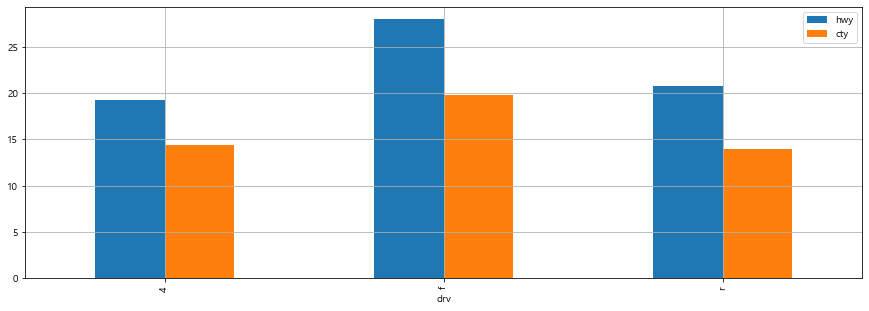

In [78]:
drop2_merge_bar.plot(kind='bar', figsize=(15,5))
plt.grid()
plt.show()
plt.close()

In [80]:
# 자동차(class)중에서 어떤 자동차가 가장 많은지 알아보려고 한다.
# 종류별 빈도를 막대바로 시각화 해 보자(나중에)

# 값의 종류별 빈도수 검사

values_cnt_series = mpg_frm['class'].value_counts()
values_cnt_series

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

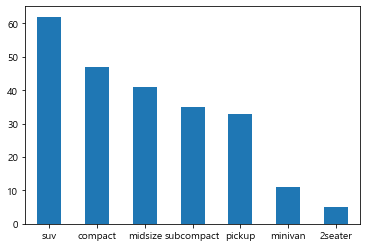

In [82]:
values_cnt_series.plot(kind = 'bar', rot = 0)

plt.show()
plt.close()

In [85]:
# 어떤 회사에서 생산한 suv 차종의 도시 연비가 높은지를 알아보려고 한다
# suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 바로 시각화 해 보자(나중에)
# cty 컬럼을 기준으로 역순정렬
# 정렬결과에 대한 상위 5건 추출

manu_subset = mpg_frm[['manufacturer', 'class', 'cty']]
suv_manu_mpg = manu_subset[manu_subset['class'] =='suv']
mf_suv_cty = suv_manu_mpg.groupby('manufacturer').mean()
bar03_mpg = mf_suv_cty['cty'].sort_values(ascending = False).head(5)
bar03_mpg

manufacturer
subaru     18.833333
toyota     14.375000
nissan     13.750000
jeep       13.500000
mercury    13.250000
Name: cty, dtype: float64

In [87]:
mpg_frm.rename({'class':'grade'}, axis=1, inplace = True)
suv_mpg_frm = mpg_frm.query("grade == 'suv'")[['manufacturer', 'cty']].groupby('manufacturer').mean()

<AxesSubplot:xlabel='manufacturer'>

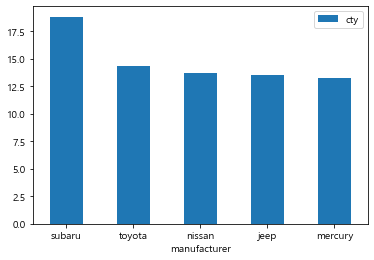

In [88]:
suv_mpg_frm.sort_values(by='cty', ascending = False).head(5).plot(kind='bar', rot=0)

- pie plot
- 카테고리별 값의 상대적 비교를 해야할 경우

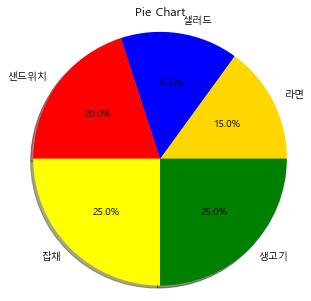

In [93]:
labels = ['라면', '샐러드', '샌드위치', '잡채', '생고기']
sizes = [15,15,20,25,25]
colors = ['gold', 'blue', 'red', 'yellow', 'green']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels = labels, colors = colors, shadow = True, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.axis('equal')

plt.show()
plt.close()

In [95]:
# 데이터의 개수 카운트를 위해서 1을 가진 열(cnt)을 추가
# 제조국가 값을 나라명 변경 1: 미국, 2: 대한민국, 3:중국
# 제조국에 대한 파이 차트 그리기 - cnt
# 범례
auto_mpg_frm['origin'].unique()

array([1, 3, 2], dtype=int64)

In [97]:
auto_mpg_frm['cnt'] = 1

In [101]:
manu_pie = auto_mpg_frm.groupby('origin').sum()['cnt']

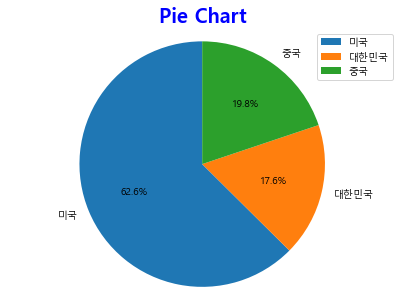

In [107]:
plt.figure(figsize=(7,5))
plt.pie(manu_pie.values, labels = ['미국','대한민국','중국'],
        startangle = 90, autopct='%1.1f%%')

plt.title('Pie Chart', size = 20, weight = 'bold', color= 'blue')
plt.legend(loc = 'best')
plt.axis('equal')

plt.show()
plt.close()

- hist plot: 구간에 대한 데이터 집계

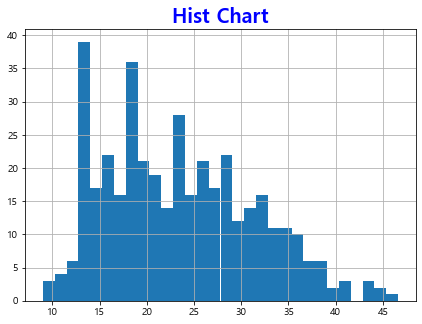

In [110]:
# 연비(mpg) 열에 대한 히스토그램을 시각화
auto_mpg_frm['mpg']

plt.figure(figsize = (7,5))
plt.hist(auto_mpg_frm['mpg'], bins = 30)

plt.title('Hist Chart', size = 20, weight = 'bold', color = 'blue')
plt.grid()
plt.show()
plt.close()

In [112]:
mpg_frm.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,grade,price_fl
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76


<AxesSubplot:>

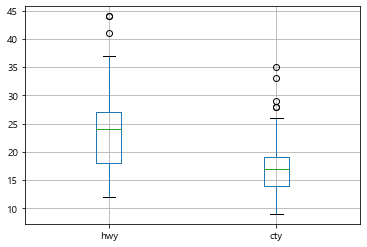

In [114]:
# 이상치 정제
# car_mpg 데이터에서 구동방식별 고속도로 연비 평균과 도시연비 평균을 극단치를 제외하고 확인
# 각 연비별 이상치 확인 boxplot()
outlier_frm = mpg_frm[['hwy', 'cty']]
outlier_frm.boxplot()

In [116]:
# 사분위 정보 - quantile()
print('3사분위 - \n', outlier_frm.quantile(q=0.75))
print('1사분위 - \n', outlier_frm.quantile(q=0.25))

3사분위 - 
 hwy    27.0
cty    19.0
Name: 0.75, dtype: float64
1사분위 - 
 hwy    18.0
cty    14.0
Name: 0.25, dtype: float64


In [117]:
# IQR (3사분위 수 - 1사분위 수)
iqr = outlier_frm.quantile(q=0.75) - outlier_frm.quantile(q=0.25)
iqr

hwy    9.0
cty    5.0
dtype: float64

In [118]:
lower = outlier_frm.quantile(q=0.25) - 1.5 * iqr
lower

hwy    4.5
cty    6.5
dtype: float64

In [119]:
upper = outlier_frm.quantile(q=0.75) + 1.5 * iqr
upper

hwy    40.5
cty    26.5
dtype: float64

In [134]:
# 도시 연비의 이상치 데이터 추출

print(outlier_frm['hwy'][outlier_frm['hwy'] > upper['hwy']])
print(outlier_frm['cty'][outlier_frm['cty'] > upper['cty']])
display(mpg_frm.query('hwy > ' + str(upper['hwy'])))
display(mpg_frm.query('cty > ' + str(upper['cty'])))


213    44
222    44
223    41
Name: hwy, dtype: int64
100    28
197    28
213    33
222    35
223    29
Name: cty, dtype: int64


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,grade,price_fl
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.38
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,2.38
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.38


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,grade,price_fl
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,2.22
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,2.22
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.38
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,2.38
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.38


In [135]:
# hwy 연비에 대한 이상치를 결측값으로 변경
# 결측값 있는지 확인

hwy_outlier_frm = mpg_frm.query('hwy > ' + str(upper['hwy']))
cty_outlier_frm = mpg_frm.query('cty > ' + str(upper['cty']))

result_frm = mpg_frm.copy()

for idx in hwy_outlier_frm.index :
    result_frm.loc[idx, 'hwy'] = np.NaN
    
result_frm.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             3
fl              0
grade           0
price_fl        0
dtype: int64

In [136]:
# cty 연비에 대한 이상치를 결측값으로 변경
# 결측값 있는지 확인

for idx in cty_outlier_frm.index :
    result_frm.loc[idx, 'cty'] = np.NaN
    
result_frm.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             3
fl              0
grade           0
price_fl        0
dtype: int64

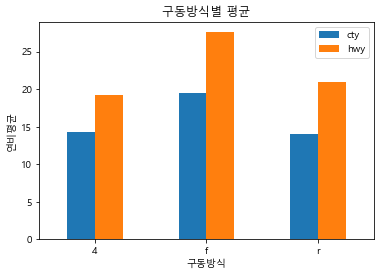

In [147]:
# 결측값 제거한 구동방식별 고속도로, 도시 연비 평균 시각화로 비교

result_frm.dropna(inplace=True)
total_drv_frm = result_frm.groupby('drv')[['cty', 'hwy']].mean()
total_drv_frm.plot(kind = 'bar', rot = 0)

plt.title('구동방식별 평균')
plt.xlabel('구동방식')
plt.ylabel('연비평균')
plt.legend(loc = 'best')

plt.show()
plt.close()